In [95]:
import matplotlib.pyplot as plt
import torch
from torch import nn

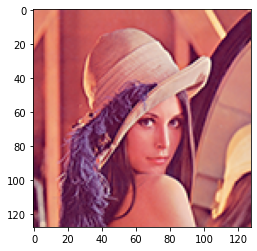

In [96]:
image_path=".\pic\lenna.png"
pic=plt.imread(image_path)
pic=torch.tensor(pic)
plt.imshow(pic)
plt.show()

In [97]:
#批量大小+通道数+单通道数据
temp=torch.zeros([1,pic.shape[2],pic.shape[0],pic.shape[1]])

for i in range(pic.shape[2]):
    temp[0,i,:,:]=pic[:,:,i]
print(temp.shape)

conv2d=nn.Conv2d(3,3,kernel_size=(3,3),padding=(1,1),stride=(2,2))

#多个通道,多个卷积核,每个通道都有独自的卷积核
#分别卷积后相加
#1*1卷积核 融合多通道

torch.Size([1, 3, 128, 128])


In [98]:
#最大池化
def max_pooling(x,y,pic):
    h=pic.size()[0]-x#行数-1
    w=pic.size()[1]-y#列数-1
    if(len(pic.size())>2):#注意保留通道数
        res=torch.zeros(h+1,w+1,pic.size()[2])
        for k in range(pic.size()[2]):#k维
            #从卷积核的左上角开始遍历
            for i in range(0,h+1):# 行
                for j in range(0,w+1):#列
                    res[i,j,k]=(pic[i:i+x,j:j+y,k]).max()
        return res
    else:
        res=torch.zeros(h+1,w+1)

        #从卷积核的左上角开始遍历
        for i in range(0,h+1):# 行
            for j in range(0,w+1):#列
                res[i,j]=(pic[i:i+x,j:j+y]).max()
        return res
x0=torch.arange(9).reshape([3,3])
max_pooling(2,2,x0)
        

tensor([[4., 5.],
        [7., 8.]])

In [99]:
x0=x0.float()#必须使用浮点数
torch.mean(x0)

tensor(4.)

In [100]:
#平均池化层
def mean_pooling(x,y,pic):
    h=pic.size()[0]-x#行数-1
    w=pic.size()[1]-y#列数-1
    if(len(pic.size())>2):#注意保留通道数
        res=torch.zeros(h+1,w+1,pic.size()[2])
        for k in range(pic.size()[2]):#k维
            #从卷积核的左上角开始遍历
            for i in range(0,h+1):# 行
                for j in range(0,w+1):#列
                    res[i,j,k]=(pic[i:i+x,j:j+y,k]).float().mean()
        return res
    else:
        res=torch.zeros(h+1,w+1)

        #从卷积核的左上角开始遍历
        for i in range(0,h+1):# 行
            for j in range(0,w+1):#列
                res[i,j]=(pic[i:i+x,j:j+y]).float().mean()
        return res
x0=torch.arange(9).reshape([3,3])
mean_pooling(2,2,x0)

tensor([[2., 3.],
        [5., 6.]])

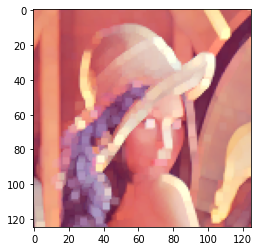

In [104]:
pic1=max_pooling(4,4,pic)
plt.imshow(pic1)

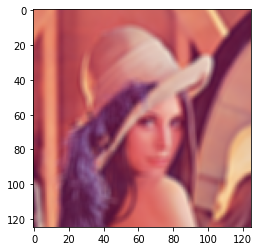

In [132]:
pic1=mean_pooling(4,4,pic)
plt.imshow(pic1)

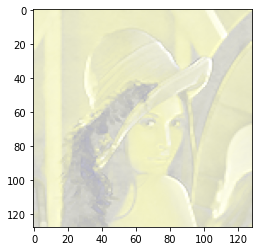

In [134]:
pool=nn.MaxPool2d(2,padding=1,stride=1)
plt.imshow(pool(pic))